# Lineær regresjon med python

Vi ønsker å simulere en lineær tilpasning i python. Vi vil danne en lineær (affin) funksjon, trekke tilfeldige verdier for denne, legge til normalfordelt støy, og til slutt tilpasse en ny lineær funksjon til disse tallene.

## a) Trekke tilfeldige verdier

In [9]:
# Først importerer vi pakkene vi vil bruke
import numpy as np
import matplotlib.pyplot as plt

### i) 
"Lag deg en affin funksjon (f.ks $f(x) = 2x + 3$))..."

In [10]:
# Her velger vi funksjonen 3x + 5
def f(x):
    return 3*x + 5

### ii)
"...trekk 10 tilfeldige tall..."

In [11]:
randomNumbers = np.random.random(size = 10) * 5
print(randomNumbers)

[0.56999348 1.01621371 1.30652685 1.8718775  4.05168771 0.33015487
 1.90499086 0.58209006 4.10174128 3.46590256]


### iii)
"... beregn $f(x) + \epsilon$ der du setter inn et tilfeldig normalfordelt tall som $\epsilon$ med ``np.random.normal``."

In [12]:
randomNoise = np.random.normal(size = 10)
print(randomNoise)

[ 0.62357587 -2.29450644  0.60960007  0.01936473 -0.26062435 -0.27199301
  1.4919441  -1.1998134   0.95105425  1.53566846]


In [13]:
randomValues = f(randomNumbers) + randomNoise
print(randomValues)

[ 7.33355631  5.75413469  9.52918062 10.63499723 16.89443879  5.7184716
 12.20691667  5.54645679 18.2562781  16.93337614]


### iv)
"Verifiser med ett plott at ting fungerer som det skal"

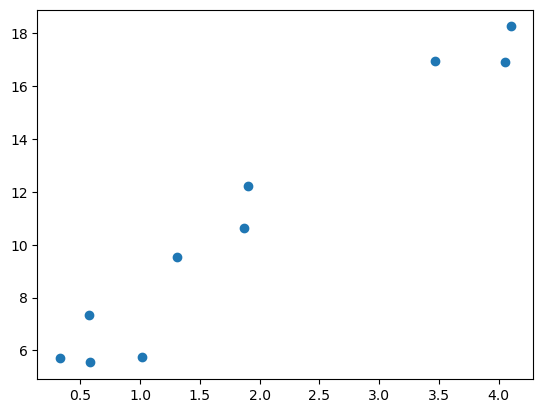

In [14]:
# Vi har tallene vi la inn i funksjonen, og tallene vi fikk ut.
# Plottingen er da ganske rett frem:

plt.plot(randomNumbers,randomValues,"o")
plt.show()

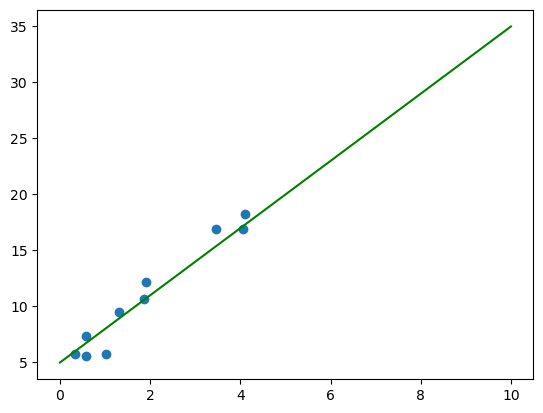

In [15]:
# Plotter de tilfeldige funksjonsverdiene
plt.plot(randomNumbers,randomValues,"o")

# Bruker skumle numpy funskjoner for å plotte grafen
X = np.linspace(0,10,100)
Y = f(X)
plt.plot(X,Y,color = "green")

plt.show()

## b)
### i)
"Gjør en lineærtilpasning med ``np.polyfit``."

In [16]:
# Vi har de tilfeldige tallene randomNumbers, og de korresponderende
# tilfeldige funksjonsverdiene (med støy) randomValues

# np.polyfit tar inn x-verdier, y-verdier, og polynomgrad
# for våre hensikter vil polynomgraden alltid være 1, så ikke tenk på den :)

# np.polyfit returnerer to tall, beta1 og beta0 (du må ikke bruke de variabelnavnene)
# Dette er en tilpasning til de to konstantene i funksjonen vår (i vårt tilfelle 3 og 5)
beta1, beta0 = np.polyfit(randomNumbers,randomValues,1)

# Printer de ekte verdiene (som vi bestemte)
print(3,5)
# Printer verdiene fra tilpasningen
print(beta1,beta0)

3 5
3.355523292733739 4.437780393812925


In [ ]:
# Ganske nærme!

## ii)
"Plott lineærtilpasningen sammen med de litt spredte punktene dine"

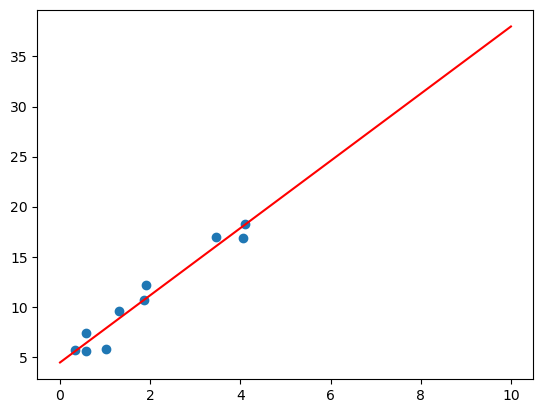

In [17]:
# Først danner vi en funksjon med beta1 og beta0
def f_tilpasset(x):
    return beta1*x + beta0

# Så gjør vi det samme som når vi plottet punktene med den ekte funksjonen:

plt.plot(randomNumbers,randomValues,"o") # "... de litt spredte punktene..."

X = np.linspace(0,10,100)
Y = f_tilpasset(X)        # Merk at vi nå har f_tilpasset()
plt.plot(X,Y,color = "red")

plt.show()

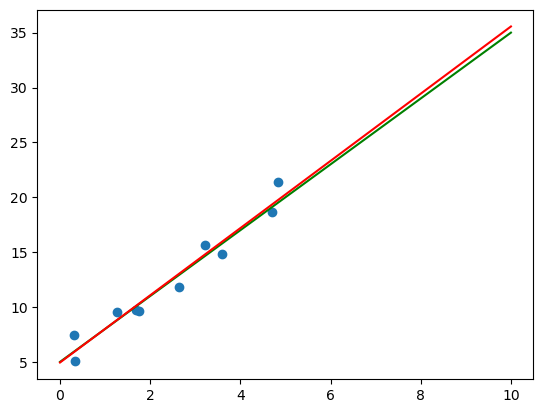

In [21]:
# Ganske bra!!!!!
# Vi kan også plotte sammen med den sanne funksjonen for å få en ide om hvor bra tilnærmingen faktisk er

plt.plot(randomNumbers,randomValues,"o") # "... de litt spredte punktene..."

X = np.linspace(0,10,100)

Y = f(X)
plt.plot(X,Y,color = "green") 
Y = f_tilpasset(X)        
plt.plot(X,Y,color = "red")

plt.show()

## c)
"Gjenta mange ganger (f. eks 10000 i en for-løkke), og lagre stigningstallet som estimeres for hver enkelt linje. Plott et histogram over stigningstallene, med ``plt.hist``."

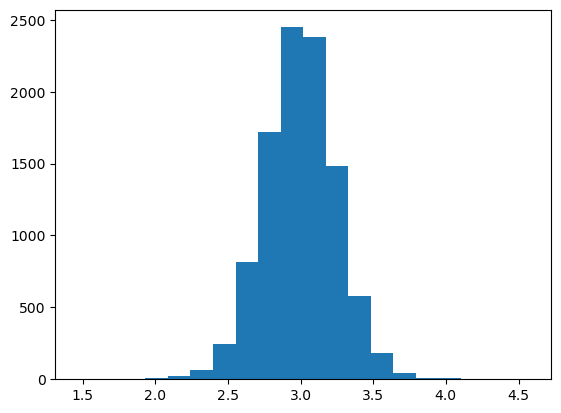

In [19]:
numRepetitions = 10000
stigningstall = np.zeros(numRepetitions)

for i in range(0,numRepetitions,1):

    # Genererer funksjonsverdier
    randomNumbers = np.random.random(size = 10) * 5
    randomNoise = np.random.normal(size = 10)
    randomValues = f(randomNumbers) + randomNoise
    
    # Tilpasser funksjonskonstanter:
    beta1, beta0 = np.polyfit(randomNumbers,randomValues,1)

    # Legger til stigningstallet i lista
    stigningstall[i] = beta1

# Vi plotter et histogram over alle beta1 vi fant:
plt.hist(stigningstall,bins = 20)
plt.show()

In [23]:
# Dette er en normalfordeling!!!